In [2]:
# Import packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter

In [44]:
# Import  datasets

rookie_path = r'C:\Users\Jeremy\Desktop\RookieRB2018.csv'
combined_path = r'C:\Users\Jeremy\Desktop\RookieRB08-17.csv'
dfrookies = pd.read_csv(rookie_path)
dfcombined = pd.read_csv(combined_path)
dfcombined.columns

Index(['Name', 'GP-Col', 'ATT-Col', 'RuYDS-Col', 'Y/A-Col', 'RuTD-Col',
       'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col', 'Height', 'Weight',
       '40 Time', 'Vertical', 'Bench Press', 'Broad Jump', 'GP', 'ATT',
       'RuYDS', 'Y/A', 'RuTD', 'REC', 'RecYDS', 'Y/R', 'RecTD', 'FantPt'],
      dtype='object')

In [45]:
# Fill empty spaces with 0s
dfcombined = dfcombined.fillna(0)
dfrookies = dfrookies.fillna(0)

In [46]:
dfrookies.head()

,Name,GP,ATT,RuYDS,Y/A,RuTD,REC,RecYDS,Y/R,RecTD,Height,Weight,40 Time,Vertical,Bench Press,Broad Jump
0,Saquon Barkley,38,671,3843,5.7,43,102,1195,11.7,8,71,233,4.41,41.0,29.0,0.0
1,Rashaad Penny,51,488,3656,7.5,38,42,479,11.4,6,71,220,4.46,32.5,13.0,120.0
2,Sony Michel,47,590,3613,6.1,33,64,621,9.7,6,71,215,4.54,0.0,22.0,0.0
3,Nick Chubb,47,758,4769,6.3,44,31,361,11.6,4,71,227,4.53,38.5,29.0,120.0
4,Ronald Jones II,40,591,3619,6.1,39,32,302,9.4,3,71,208,4.65,36.5,0.0,0.0


In [47]:
dfcombined.head()

,Name,GP-Col,ATT-Col,RuYDS-Col,Y/A-Col,RuTD-Col,REC-Col,RecYDS-Col,Y/R-Col,RecTD-Col,...,GP,ATT,RuYDS,Y/A,RuTD,REC,RecYDS,Y/R,RecTD,FantPt
0,Jamaal Charles,38,533,3328,6.2,36,49,539,11.0,3,...,16,67,357,5.33,0,27,272,10.07,1,69
1,Darren McFadden,38,785,4590,5.8,41,46,365,7.9,2,...,13,113,499,4.42,4,29,285,9.83,0,102
2,BenJarvus Green-Ellis,47,920,3869,4.2,25,39,316,8.1,1,...,9,74,275,3.72,5,3,37,12.33,0,61
3,Jonathan Stewart,36,516,2891,5.6,27,49,334,6.8,4,...,16,184,836,4.54,10,8,47,5.88,0,148
4,Chris Johnson,47,624,2982,4.8,32,125,1296,10.4,10,...,15,251,1228,4.89,9,43,260,6.05,1,209


In [139]:
# Train and test set construction

train, test = train_test_split(dfcombined, test_size=0.25, random_state=42)
 
xtrain = train[['GP-Col', 'ATT-Col', 'RuYDS-Col', 'Y/A-Col', 'RuTD-Col',
       'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col', 'Height', 'Weight',
       '40 Time', 'Vertical', 'Bench Press', 'Broad Jump']]
ytrain = train[['FantPt']]
 
xtest = test[['GP-Col', 'ATT-Col', 'RuYDS-Col', 'Y/A-Col', 'RuTD-Col',
       'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col', 'Height', 'Weight',
       '40 Time', 'Vertical', 'Bench Press', 'Broad Jump']]
ytest = test[['FantPt']]

In [140]:
#Linear Regression

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

        FantPt
39  -95.599122
25 -110.412070
26   12.379546
43  103.425009
35 -148.695651
41   83.136842
4   -50.462966
12  140.025149
8   -32.660725
3    23.686748
6   -34.084052
24   -4.088065
Coefficients: 
 [[ -0.14852552  -0.41962416   0.11671754 -39.65016841  -4.29918895
    1.72765376  -0.06627072   7.63061048   0.34511428 -17.45696348
    3.19694989 -10.57738424  -0.163928    -0.56022633  -0.15027796]]
Mean squared error: 7180.159
Variance score: -0.604


In [141]:
# Ridge Regression

ridgeReg = linear_model.Ridge(alpha = 50)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

        FantPt
39  -94.739230
25  -84.096193
26  -11.588943
43   81.755286
35 -171.053425
41   42.769130
4   -59.376074
12  138.750823
8   -20.908724
3     4.580224
6   -36.368152
24  -17.983891
Coefficients: 
 [[ 8.72575078e-02  6.43682934e-03  2.17500518e-02 -1.47055782e+00
  -2.67692474e+00  5.78739439e-01  1.23172125e-02  2.55846596e+00
   4.92528744e-01 -7.50674748e+00  1.99601734e+00 -2.34145048e+00
   3.69966966e-01 -7.76562353e-02 -3.45104323e-01]]
Mean squared error: 6569.660
Variance score: -0.468


In [142]:
# Support Vector

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_rbf = svr_rbf.predict(xtest)

print(y_rbf - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rbf))
print('Variance score: %.3f' % r2_score(ytest, y_rbf))

39   -100.691324
25    -51.691324
26     13.308676
43     78.308676
35   -160.691324
41    -16.691324
4     -76.691324
12     82.308676
8      11.308676
3     -15.691324
6     -37.691324
24      5.879041
Name: FantPt, dtype: float64
Mean squared error: 4975.499
Variance score: -0.112


In [143]:
# Bayesian Ridge 

bayesianRidge = linear_model.BayesianRidge()

bayesianRidge.fit(xtrain, ytrain)

y_pred_bayesianRidge = bayesianRidge.predict(xtest)

print('Coefficients: \n', bayesianRidge.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred_bayesianRidge))
print('Variance score: %.3f' % r2_score(ytest, y_pred_bayesianRidge))

Coefficients: 
 [ 9.71550309e-06  1.26756374e-04 -3.44542369e-04 -1.67265914e-06
 -1.76665355e-06  1.07120398e-04  1.31575035e-03  4.85304590e-06
  9.52269171e-06 -2.31177042e-06  4.24741486e-05 -1.46085529e-06
 -1.87772523e-05  5.18555131e-06 -1.51712336e-04]
Mean squared error: 4969.882
Variance score: -0.110


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
# Linear Regression predictions

rookieRB = dfrookies.loc[:, 'GP': 'Broad Jump']

linear_preds = linReg.predict(rookieRB)

names = dfrookies.iloc[:, 0]
print("2018 NFL season fantasy PPG prediction for top RBs using Linear Regression: ")
for i, j in zip(linear_draftClass, names):
    print(i, j)

2018 NFL season fantasy PPG prediction for top RBs using Linear Regression: 
[230.27221963] Saquon Barkley
[124.47770079] Rashaad Penny
[171.37140676] Sony Michel
[164.80766399] Nick Chubb
[92.22699045] Ronald Jones II
[64.85053688] Kerryon Johnson
[146.53915287] Derrius Guice
[171.00005045] Royce Freeman
[165.24074527] Nyheim Hines
[87.64262485] Mark Walton
[160.06558902] Phillip Lindsay


In [145]:
# Ridge Regression predictions

ridge_preds = ridgeReg.predict(rookieRB)
print("2018 NFL season fantasy PPG prediction for top RBs using Ridge Regression: ")
for i, j in zip(ridge_preds, names):
    print(i, j)

2018 NFL season fantasy PPG prediction for top RBs using Ridge Regression: 
[229.19796915] Saquon Barkley
[121.14861295] Rashaad Penny
[164.61849515] Sony Michel
[138.94104814] Nick Chubb
[124.37165294] Ronald Jones II
[86.1589888] Kerryon Johnson
[164.04839982] Derrius Guice
[143.2473998] Royce Freeman
[141.2574384] Nyheim Hines
[96.9029738] Mark Walton
[136.69027193] Phillip Lindsay


[['Saquon Barkley', 230.27221963341776], ['Sony Michel', 171.37140676120816], ['Royce Freeman', 171.0000504535534], ['Nyheim Hines', 165.24074526720472], ['Nick Chubb', 164.807663994859], ['Phillip Lindsay', 160.0655890231535], ['Derrius Guice', 146.53915287288362], ['Rashaad Penny', 124.4777007875067], ['Ronald Jones II', 92.22699044697299], ['Mark Walton', 87.64262485371421], ['Kerryon Johnson', 64.85053688376752]]


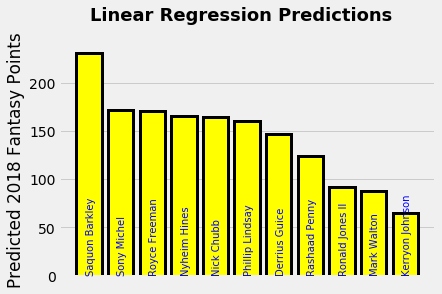

In [146]:
# Plotting and displaying linear predictions

plt.style.use('fivethirtyeight')
linRegPredictions, ax = plt.subplots()

linearPlot = []

for i in linear_preds:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(names, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1), reverse = True)
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
x_pos = np.arange(len(sortedLinearData))

ax.bar(x_pos, sortedLinearData, color = 'yellow', edgecolor = 'Black', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue', size = 10)

linRegPredictions.suptitle("Linear Regression Predictions", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Fantasy Points")

linRegPredictions.savefig('linear_fantpt_predictions.png', dpi = 400, bbox_inches = 'tight')

[['Saquon Barkley', 229.19796914893712], ['Sony Michel', 164.61849514986736], ['Derrius Guice', 164.04839982291634], ['Royce Freeman', 143.24739979578337], ['Nyheim Hines', 141.25743840361613], ['Nick Chubb', 138.9410481382546], ['Phillip Lindsay', 136.69027193495614], ['Ronald Jones II', 124.37165294270213], ['Rashaad Penny', 121.14861295459278], ['Mark Walton', 96.90297380448733], ['Kerryon Johnson', 86.15898879977729]]


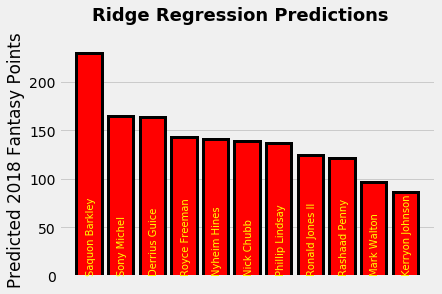

In [147]:
# Plotting and displaying ridge projections

ridgeRegPredictions, ax = plt.subplots()

ridgePlot = []

for i in ridge_preds:
    ridgePlot.append(float(i))
    
combinedRidge = [[i, j] for i, j in zip(names, ridgePlot)]

sortedRidge = sorted(combinedRidge, key = itemgetter(1), reverse = True)
print(sortedRidge)

sortedRidgeData = [row[1] for row in sortedRidge]
x_pos = np.arange(len(sortedRidgeData))

ax.bar(x_pos, sortedRidgeData, color = 'red', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedRidge]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow', size = 10)

ridgeRegPredictions.suptitle("Ridge Regression Predictions", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Fantasy Points")

ridgeRegPredictions.savefig('ridge_fantpt_predictions.png', dpi = 400, bbox_inches = 'tight')

[['Saquon Barkley', 229.73509439117743], ['Sony Michel', 167.99495095553777], ['Royce Freeman', 157.1237251246684], ['Derrius Guice', 155.29377634789998], ['Nyheim Hines', 153.2490918354104], ['Nick Chubb', 151.8743560665568], ['Phillip Lindsay', 148.37793047905484], ['Rashaad Penny', 122.81315687104974], ['Ronald Jones II', 108.29932169483756], ['Mark Walton', 92.27279932910076], ['Kerryon Johnson', 75.5047628417724]]


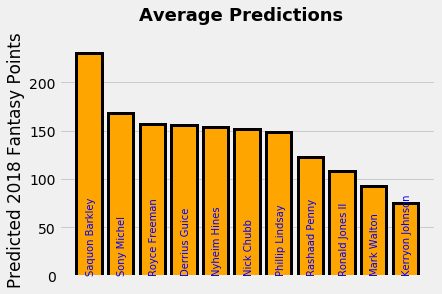

In [148]:
# Average predictions

avgPredictions, ax = plt.subplots()

averagePred = []

for i, j in zip(linear_preds, ridge_preds):
    averagePred.append(float((i + j) / 2))

combinedAvg = [[i, j] for i, j in zip(names, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1), reverse = True)
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color='orange', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue', size =10)

avgPredictions.suptitle("Average Predictions", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Fantasy Points")

avgPredictions.savefig('avg_predictions.png', dpi = 400, bbox_inches = 'tight')